In [2]:
import pandas as pd
pd.set_option('display.max_columns', 50)
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from tqdm import tqdm

In [3]:
# data frame all tracks with features from 1921-2020
df = pd.read_csv('data/music_with_genres.csv').drop('Unnamed: 0', axis=1)
print(df.shape)
df.head()

(101656, 22)


,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,track_id,artist_id,genre,is_pop
0,0.511,['Elton John'],0.436,380667,0.429,0,0.000103,3,0.104,-10.884,1,My Father's Gun,29,1970-10-30,0.0319,119.025,0.223,1970,2AgMTn4RyRrI1uc3iXx4Xq,3PhoLpVuITZKcymswpck5b,"['glam rock', 'mellow gold', 'piano rock', 'so...",False
1,0.465,['Three Dog Night'],0.629,166707,0.376,0,0.000000,7,0.235,-13.934,1,It Ain't Easy,26,1970-01-01,0.0337,76.848,0.347,1970,2hKxnhi2Eb3443AQbOnqNl,4FAEZeJcsYYBkNq2D3KGTV,"['album rock', 'art rock', 'blues rock', 'bril...",True
2,0.166,['Martha Reeves & The Vandellas'],0.417,176573,0.753,0,0.000000,9,0.269,-10.204,0,I Should Be Proud,33,1970,0.1260,178.408,0.794,1970,2nxSAQBvF6gDIwZmG6B9nO,1Pe5hlKMCTULjosqZ6KanP,"['brill building pop', 'classic girl group', '...",True
3,0.990,['Vashti Bunyan'],0.600,141893,0.107,0,0.011400,0,0.101,-19.189,0,Where I Like To Stand,26,1970,0.0525,117.630,0.732,1970,2vNuzzaFEPY2WGdYFhdeui,4chuPfKtATDZvbRLExsTp2,"['anti-folk', 'british folk', 'folk', 'freak f...",False
4,0.639,['Ry Cooder'],0.568,134067,0.434,0,0.626000,7,0.229,-14.170,1,Available Space,35,1970-01-01,0.0379,147.388,0.694,1970,439kdOcVhEp5gQ67eYNkKG,1CPwHx5lgVxv0rfcp7UXLx,"['blues', 'blues rock', 'country blues', 'coun...",False


## Understanding the Features ##

Below, I do an exploration of certain features that are not as straight forward to understand either because of their value ranges or the feature itself.

In [4]:
df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,101656.000000,101656.000000,1.016560e+05,101656.000000,101656.000000,101656.000000,101656.000000,101656.000000,101656.000000,101656.000000,101656.000000,101656.000000,101656.000000,101656.000000,101656.000000
mean,0.296220,0.566567,2.435079e+05,0.605473,0.121331,0.095581,5.247433,0.201672,-9.387156,0.701041,45.229509,0.080092,120.629224,0.539649,1994.920015
std,0.305025,0.174132,1.014723e+05,0.240014,0.326513,0.240922,3.549025,0.181356,4.898656,0.457804,13.599671,0.093447,30.045454,0.258032,14.679558
min,0.000000,0.000000,1.470800e+04,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1970.000000
25%,0.029000,0.450000,1.915330e+05,0.441000,0.000000,0.000000,2.000000,0.092600,-11.846000,0.000000,35.000000,0.033800,97.013000,0.334000,1982.000000
50%,0.178000,0.576000,2.291480e+05,0.629000,0.000000,0.000049,5.000000,0.128000,-8.392000,1.000000,44.000000,0.044700,118.837000,0.547000,1995.000000
75%,0.517000,0.694000,2.753070e+05,0.802000,0.000000,0.009310,8.000000,0.255000,-5.893000,1.000000,55.000000,0.077600,139.935000,0.754000,2008.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.744000,1.000000,100.000000,0.964000,244.091000,1.000000,2020.000000


In [5]:
# create temp df that contains only numerical features
num_cols = ['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 
            'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo', 'valence', 'year']

temp = df[num_cols]

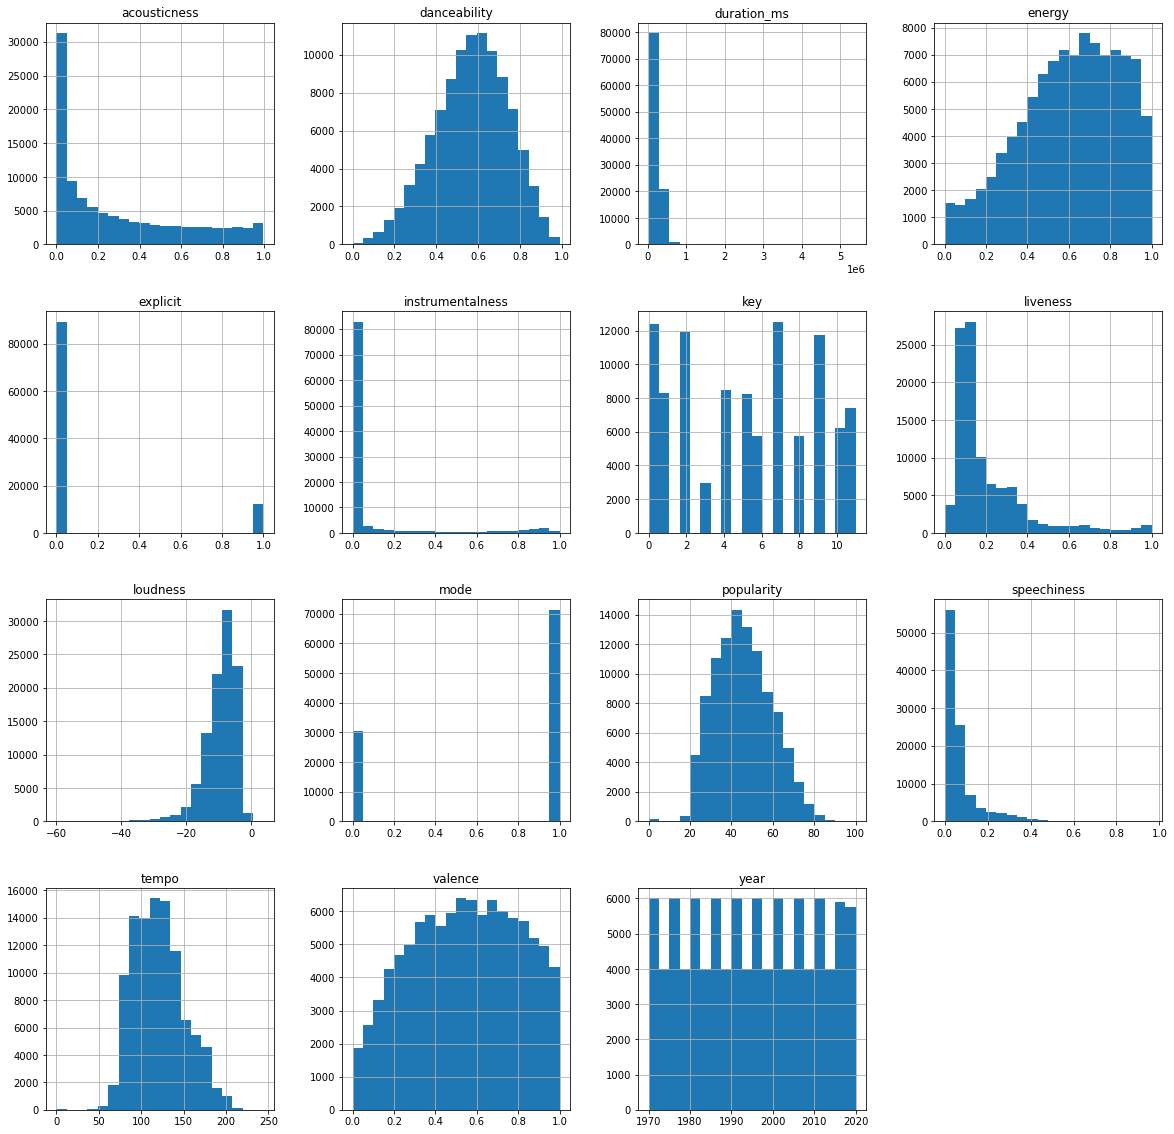

In [6]:
temp.hist(bins=20, figsize=(20,20));

### Loudness ###

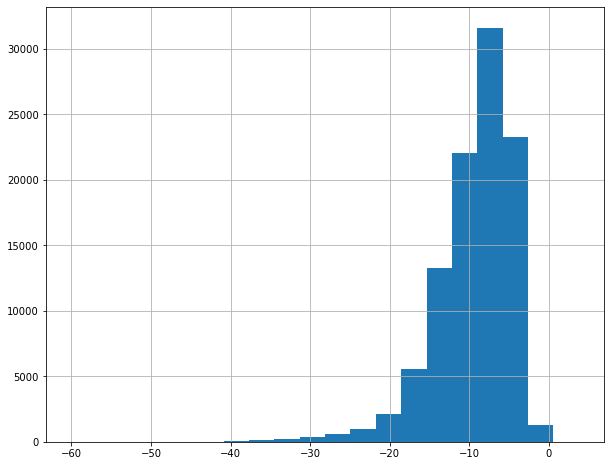

In [7]:
df.loudness.hist(bins=20, figsize=(10,8))

The typical range of values is between -60 to 0, acording to Spotify documentation. -60 is absolute silence and the track becomes louder the closer the value is to 0. 

In [8]:
df[df.loudness >= -2].artists.value_counts()[:20]

['Ramones']                   27
['Red Hot Chili Peppers']     18
['Eminem']                    17
['JAY-Z']                     10
['Slipknot']                   8
['The Stooges']                8
['50 Cent']                    7
['System Of A Down']           6
['Atmosphere']                 6
['Zero Boys']                  6
['Metallica']                  5
["Girls' Generation"]          5
['TWICE']                      5
['The White Stripes']          4
['Choking Victim']             4
['Three 6 Mafia']              4
['Britney Spears']             4
['BTS']                        4
['Sergio Vega "El Shaka"']     4
['Panic! At The Disco']        4
Name: artists, dtype: int64

A number of outliers. Some tracks are very loud and and exceed -2 db. Interestingly, it is the same artists that produce these tracks. Ramones, Red Hot Chili Peppers, The Stooges, Slipknot, etc. all hover around the same genre. While, Eminem, JAY-Z, 50 Cent are similar in genre as well. Even though they are outliers it will be worth keeping them in the data as the loudness may be indicative of the genre.

In [9]:
df[df.loudness <= -40].artists.value_counts()

['Robert Schumann', 'Martha Argerich']                                                              3
['Binaural Beats Sleep']                                                                            2
['Ludwig van Beethoven', 'Louis Lortie']                                                            2
['Baby Lullaby Academy']                                                                            2
['John Williams']                                                                                   2
['Camille Saint-Saëns', 'Mischa Maisky', 'Orpheus Chamber Orchestra']                               1
['Ludwig van Beethoven', 'Daniel Barenboim']                                                        1
['520Hz']                                                                                           1
['Robert Earl Keen']                                                                                1
['Thomas Newman', 'The Hollywood Studio Symphony']                                

There are also a lot of quiet songs that are less that -40 db. These tend to be some classical music artists, lullabies, and music for going to sleep. Again, while they are outliears it can help with the clustering.

### Tempo ###

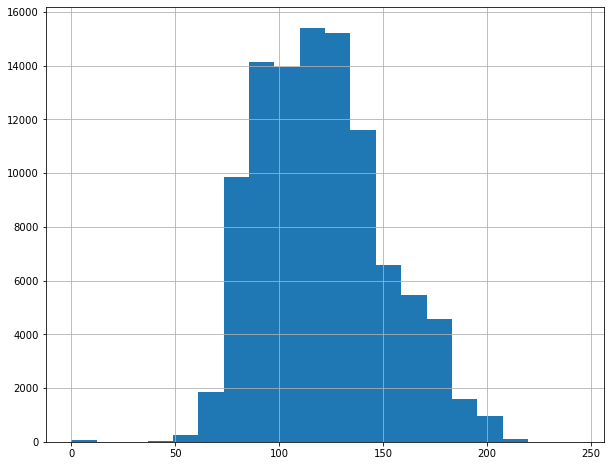

In [10]:
df.tempo.hist(bins=20, figsize=(10,8))

In [11]:
df.sort_values('tempo')

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,track_id,artist_id,genre,is_pop
55568,0.944000,['Granular'],0.000,135484,0.000020,0,0.86900,2,0.1120,-40.449,0,White Noise - 145 hz,80,2017-10-13,0.0000,0.000,0.000,2017,6H4B9gJD6eQlNoEh8q85pP,1jfnMuDBl5OaAoU0VwLD8m,"['sleep', 'white noise']",False
10017,0.000904,['Sounds of Nature Noise'],0.000,179187,0.000139,0,0.83400,1,0.5390,-18.249,1,Soft Thunder,67,2019-10-03,0.0000,0.000,0.000,2019,62kBhPaUyrsGzmsaZJ35xh,1ZJbPwe4zKnUDRT7yi9dBC,['shush'],False
25617,0.346000,['José Alfredo Jimenez'],0.000,144760,0.305000,0,0.00000,11,0.4910,-13.098,1,Yo Debí Enamorarme de Tu Madre,28,1971-01-12,0.0000,0.000,0.000,1971,1MXN1vXXYndE2BHNgOaWj7,2T06whb4s6UiufL1j5Qtz9,"['bolero', 'grupera', 'mariachi', 'ranchera']",False
71579,0.912000,['Ernie'],0.000,148547,0.506000,0,0.00000,7,0.3100,-9.923,0,Rubber Duckie,33,1974-01-01,0.0000,0.000,0.000,1974,66avoTjnpc1Wv6AFX07mhm,1qkEx9YPevCOQhazUZK1bJ,"[""children's music""]",False
14506,0.119000,['Brown Noise'],0.000,570654,0.000020,0,0.42900,0,0.4670,-16.517,1,Brown Noise,50,2013-03-21,0.0000,0.000,0.000,2013,2LsevvtdFSKb8ztwOvQXf0,4H1DT9A2uoT7pTVRDSolnk,['white noise'],False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27385,0.084100,['Suicide'],0.157,229840,0.500000,0,0.68800,6,0.2230,-14.337,0,Surrender - 2005 Remastered Version,30,1988-01-01,0.0464,224.437,0.359,1988,0XRX7qxRLh4HFvDqvD1hHV,6uVeWolwyRDrT84lLsaZyW,"['alternative rock', 'art rock', 'dance rock',...",False
61114,0.261000,['Grateful Dead'],0.332,373970,0.423000,0,0.00014,0,0.0716,-12.102,1,Candyman - 2013 Remaster,43,1970-06-01,0.0384,236.799,0.519,1970,4FJ0051ukEptZAhP01ExGV,4TMHGUX5WI7OOm53PqSDAT,"['classic rock', 'cosmic american', 'country r...",False
66343,0.196000,['J.J. Cale'],0.466,147200,0.188000,0,0.65700,1,0.0820,-18.309,0,Call The Doctor,48,1972,0.0547,243.372,0.615,1972,55ROr3cl3yi4YRBgfpDy1d,06nsZ3qSOYZ2hPVIMcr1IN,"['blues', 'blues rock', 'classic rock', 'count...",False
86747,0.497000,['Bill Withers'],0.535,277221,0.380000,0,0.25700,11,0.0720,-13.790,0,I Don't Want You on My Mind,36,1972-05-01,0.0497,243.507,0.828,1972,56n7xjncKs9RInEHAmjtco,1ThoqLcyIYvZn7iWbj8fsj,"['funk', 'motown', 'quiet storm', 'soul']",False


Some tracks have very low tempo. These are usually white noise tracks, silent tracks, or sounds of rain. Really high tempo songs tend to be rock songs , blues, etcs. Again, while these are outliers they are indicative of certain genres.

## Notable Correlations ##

In [12]:
# check which features have notable correlations
temp.corr()[(temp.corr() <= -0.3) | (temp.corr() >= 0.3)]

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
acousticness,1.000000,NaN,NaN,-0.698513,NaN,NaN,NaN,NaN,-0.548065,NaN,NaN,NaN,NaN,NaN,NaN
danceability,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.515564,NaN
duration_ms,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
energy,-0.698513,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.747830,NaN,NaN,NaN,NaN,0.320899,NaN
explicit,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.466648,NaN,NaN,0.330890
instrumentalness,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,-0.399432,NaN,NaN,NaN,NaN,NaN,NaN
key,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
liveness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loudness,-0.548065,NaN,NaN,0.747830,NaN,-0.399432,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.343870
mode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


Some notable correlations/relationships:
- as the accousticness of a track increases, loudness decreases moderately and energy decreases strongly
- as danceability increases, valence tends to increases moderately
- as the energy of a track increases, the loudness of the track tends to increase strongly
- as energy of a track increases, valence increases somewhat
- as instrumentalness increases, loudness decreases somewhat
- there is a strong relationship between popularity and release year (newer songs tend to be more popular)
- there is moderate relationship between explicitness and speechiness of a track
- there is somewhat of a relationship between explicitness and release year of a track
- there is somewhat of a relationship between loudness and release year

# Initial Models #

In [13]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as hc
from scipy.cluster.hierarchy import dendrogram, linkage

## Preprocessing ##

In [14]:
# continuous numerical features
num_features = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 
                'popularity', 'speechiness', 'tempo', 'valence']

# cateogrical features
cat_features = ['explicit', 'key', 'mode', 'year']

# separate numerical features and categorical features for scaling, and set track_id as index
num_df = df.set_index('track_id')[num_features]
cat_df = df.set_index('track_id')[cat_features]

In [15]:
# scale the numerical data to be between 0 and 1 since most of the features are already in that range 
scaler = MinMaxScaler()
# fit and transform the data
scaled_data = scaler.fit_transform(num_df)
# create new data frame for the scaled data
scaled_df = pd.DataFrame(scaled_data, index=num_df.index, columns=num_df.columns)
# merge scaled features with the categorical features
model_df = scaled_df.merge(cat_df, left_index=True, right_index=True)

In [16]:
model_df

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence,explicit,key,mode,year
track_id,,,,,,,,,,,,,,,
2AgMTn4RyRrI1uc3iXx4Xq,0.513052,0.441296,0.067911,0.429,0.000103,0.1040,0.770520,0.29,0.033091,0.487626,0.223,0,3,1,1970
2hKxnhi2Eb3443AQbOnqNl,0.466867,0.636640,0.028207,0.376,0.000000,0.2350,0.722672,0.26,0.034959,0.314833,0.347,0,7,1,1970
2nxSAQBvF6gDIwZmG6B9nO,0.166667,0.422065,0.030037,0.753,0.000000,0.2690,0.781187,0.33,0.130705,0.730908,0.794,0,9,0,1970
2vNuzzaFEPY2WGdYFhdeui,0.993976,0.607287,0.023602,0.107,0.011400,0.1010,0.640233,0.26,0.054461,0.481910,0.732,0,0,0,1970
439kdOcVhEp5gQ67eYNkKG,0.641566,0.574899,0.022149,0.434,0.626000,0.2290,0.718970,0.35,0.039315,0.603824,0.694,0,7,1,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4KppkflX7I3vJQk7urOJaS,0.173695,0.885628,0.027667,0.443,0.000032,0.0891,0.824219,0.75,0.148340,0.409732,0.306,1,1,1,2020
1ehhGlTvjtHo2e4xJFB0SZ,0.016767,0.727733,0.028348,0.385,0.031300,0.1110,0.770159,0.64,0.041805,0.524395,0.270,0,8,1,2020
52eycxprLhK3lPcRLbQiVk,0.540161,0.520243,0.030803,0.539,0.002330,0.1080,0.794867,0.70,0.108921,0.506778,0.153,0,7,1,2020


## Initial Model: Hierarchical Clustering ##

In [ ]:
# construct dendogram in scipy
Z = linkage(model_df, method = 'ward')

In [1]:
plt.figure(figsize=(35, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Tracks')
plt.ylabel('Distance')
plt.xticks([])
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_font_size=12.,
    show_contracted=True,# font size for the x axis labels
)

NameError: name 'plt' is not defined